# Using Machine Learning Tools 2021, Assignment 2

## Breast Cancer Classification

## Overview
In this assignment, you will apply two classifier types, Decision Trees and Support Vector Machines, to the problem of classifying breast cancer from a set of characteristics of the cell nuclei in an image of a fine needle aspirate of a breast mass. The Wisconsin Breast Cancer data set is available from the collection of example data sets in scikit learn.

The main aims of the assignment are:

- To use and compare two different classifier approaches on the same data set;
- To evaluate the classifiers and their structure in a white box fashion;
- To practice using pipelines and hyper parameter optimisation;
- To explore a multi-dimensional feature space and handle multi-dimensional data.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions! 
- All data processing must be done within the notebook after calling the load function.
- Comment your code, so that its purpose is clear to the reader!
- **Before submitting your notebook, make sure to reset the kernel and run all cells in your final notebook so that it works correctly!**
- In the submission file name, do not use spaces or special characters.

This assignment is divided into several tasks. Use this notebook and enter your code, results and answer text analysis under the exact number that it belongs to!

Make sure to answer every question with **separate answer text (“Answer: …”) in a Markdown cell** and check that you answered all sub-questions/aspects within the question. The text answers are worth points!

Make the **figures self-explanatory and unambiguous.** Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points!

The assignment is self-sufficient. If you need to "evaluate" or "compare", then **use the diagrams and metrics generated in the preceding tasks** of the assignment, not new ones. That is why there are specific instructions for those diagrams.


# Import Libraries

In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 1. Investigate the dataset (25%)

### 1.1 Load the Wisconsin breast cancer data set 
Do this from the scikit-learn sample data collection. Read the documentation:   
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
and https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset. 

Figure 1 below shows an example image of a tissue sample obtained by fine needle aspiration. A more detailed description of the parameters can be found in the paper by Street et al: 
https://minds.wisconsin.edu/bitstream/1793/59692/1/TR1131.pdf

<center><img src="FineNeedleAspiration.jpg" width="300" alt="Image of a collection of cells"></center>

Figure 1. Example of a fine needle aspiration tissue image showing cells and cell nuclei (dark) (Shigematsu et al. 2011, [Creative Commons 2.0 License)](http://creativecommons.org/licenses/by/2.0)

In [2]:

#Loading data from sklearn
data = datasets.load_breast_cancer()


# Convering data into pandas data frame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 1.2 Question
Read the description of each of the 10 parameters (or features) in section 3 of the paper by Street et al. (link above) but do not worry about all the details – just aim to get some intuitive grasp of what each parameter is aiming to capture. Note that the "snakes" referred to are a type of algorithm used to extract the cell boundaries (with "snake points" being points on the boundary) and you do not need to know the details of how snakes work to proceed. **Which of the 10 parameters (features) are primarily based on the geometry (or shape) of the cell and which ones are primarily based on the intensities inside or nearby the cell?**

Only **texture** feature is based on intensities inside cells all other features are based on the geometry (or shape) of the cell. Features which depend on shape of cells are Radius, 
Perimeter,
Area,
Compactness, 
Smoothness,
Concavity, 
Concave points,
Symmetry and 
Fractional Dimensions.

### 1.3 Histograms
For each of the 10 features the mean, standard error and maximum (or "worst") values are calculated across the image, which gives 30 parameters in total from each image (and there were 569 images processed). **Plot histograms** for each feature but separate the malignant cases (these are the cancerous ones, with target label=0) from the benign cases (these are non-cancerous, with target label=1), so that two distributions can be seen in each plot. This can be done with the `matplotlib` function `hist()`, using appropriate arguments, but it is easier if you use the `seaborn` function `distplot()`. Group your 30 plots so that they are clearly in three groups (one for mean values, one for standard error values, and one for "worst" values) and then have the 10 plots in each group arranged in 5 rows with 2 columns, and the three groups either horizontally or vertically aligned.  See a small, basic illustration of what it should look like below, with horizontal group alignment – when doing your own feel free to improve on this basic version.

<center><img src="Example_Hist_Plots.jpg" width="700" alt="Example plots of histograms"></center>

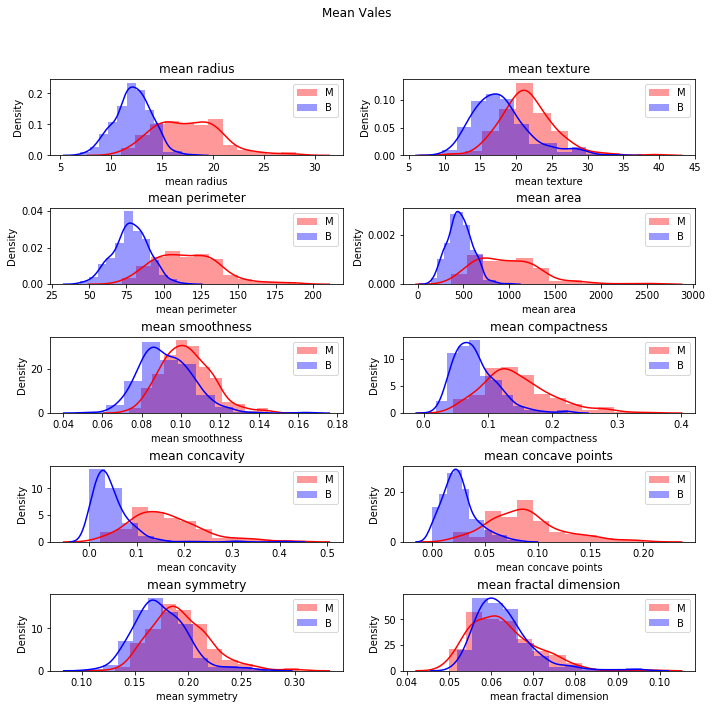

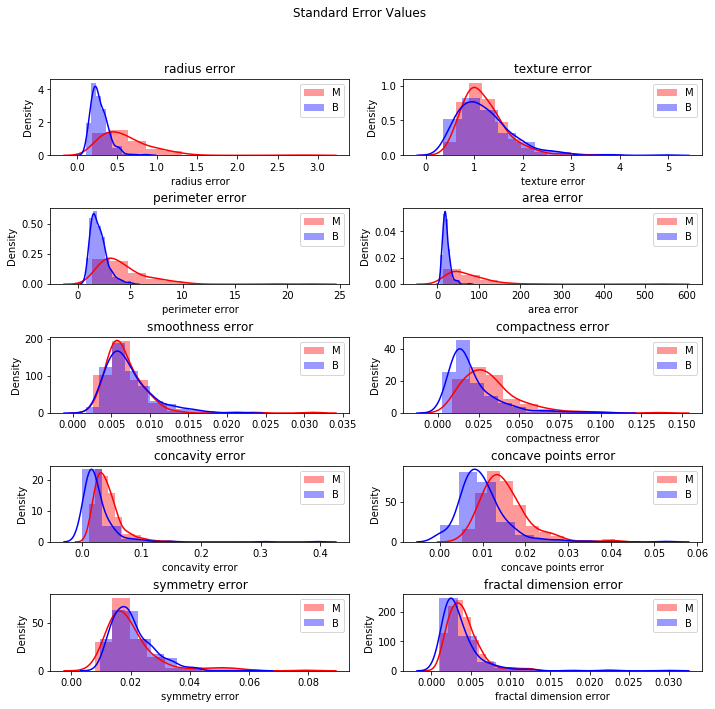

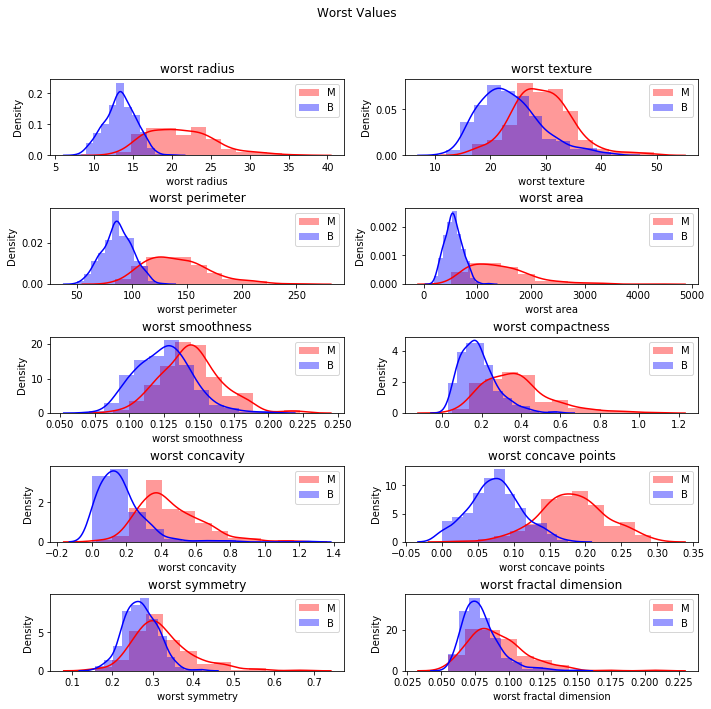

In [3]:


## Getting mean, std error and worst values columns
features_mean= list(df.columns[0:10])
features_std_error= list(df.columns[10:20])
features_worst_values= list(df.columns[20:30])


## Function to plot histogram
def plotMetrics(features_mean,title):
    
    bins = 12
    fig = plt.figure(figsize=(10,10))
    for i, feature in enumerate(features_mean):
        rows = int(len(features_mean)/2)

        plt.subplot(rows,2,i+1)

        sns.distplot(df[df['target']==0][feature], bins=bins, color='red', label='M');
        sns.distplot(df[df['target']==1][feature], bins=bins, color='blue', label='B');

        plt.legend(loc='upper right')
        plt.title(feature)
        
    plt.tight_layout()
    fig.subplots_adjust(top=0.88)
    fig.suptitle(title)
    plt.show()

##Ploting histograms   
plotMetrics(features_mean, 'Mean Vales')
plotMetrics(features_std_error, "Standard Error Values")
plotMetrics(features_worst_values, "Worst Values")


### 1.4 ROC curves
It is possible to **plot receiver-operating-characteristic (ROC) curves** for single features. Do this by considering a very simple classifier – that is one where the feature is thresholded and everything below the threshold is predicted to be one class and everything above the threshold is predicted to be the other class. By varying the threshold you can get a set of performance values and plot these as an ROC curve. It is possible to do this through sklearn calls, but in this instance it is probably easier to write a function that can return the True Positive Rate (TPR) and False Positive Rate (FPR) for a given threshold and feature. Remember that a "positive" should relate to application, so in this case an instance of cancerous cells, and not be determined by the arbitrary numbers chosen for the labelling. Then, call this function repeatedly with different thresholds (you must choose the appropriate range of thresholds) and these values can be plotted as the ROC curve, with TPR vs FPR. Create three plots (one for each group: mean; standard error; worst) and in each plot include 10 curves, one for each feature of that group, showing each curve with a different colour/line-style/marker and including an appropriate legend to identify which curve corresponds to which feature. See a small, basic illustration of what it should look like below for one group – when doing your own you can improve on this basic version.

<center><img src="example_roc.jpg" width="500" alt="Example ROC plot for one group"></center>

In [4]:
## Function to get true_false_positive values

def true_false_positive(threshold_vector, y):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y, 1)

    tpr = (true_positive.sum() / (true_positive.sum() + false_negative.sum()))
    fpr = (false_positive.sum() / (false_positive.sum() + true_negative.sum()))

    return tpr, fpr

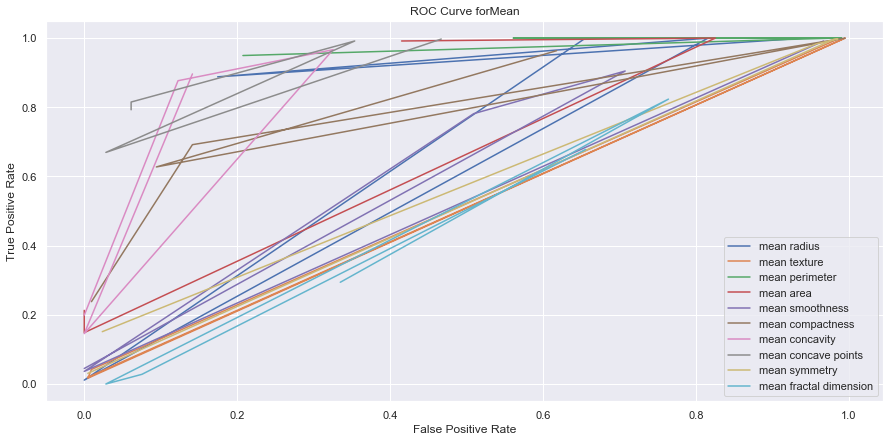

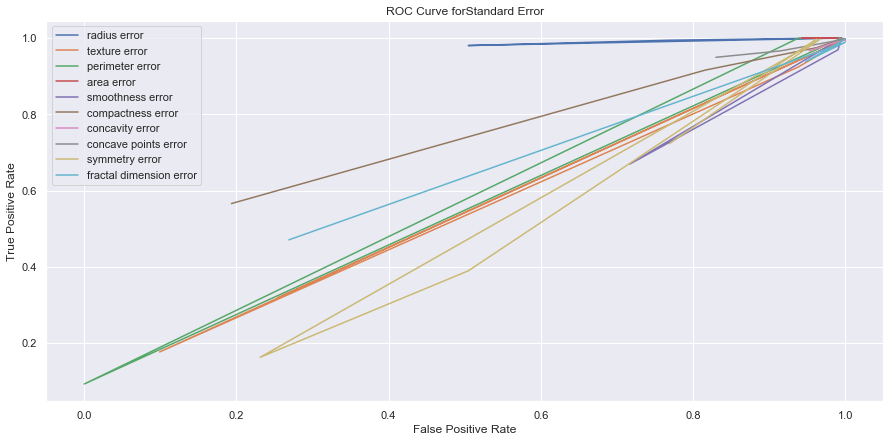

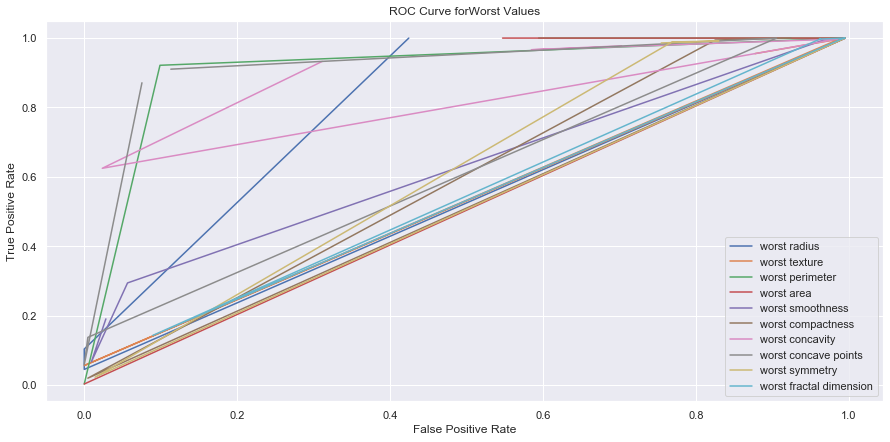

In [5]:
y = df['target']
import numpy as np
def roc_curves(df, features, title):
    sns.set()
    plt.figure(figsize=(15,7))
    for feature in features:
        f = df[feature]
        
        ##Initializing random threshold array between max and min of feature of size 5
        threshold_array = np.random.uniform(low=min(f.values), high=max(f.values), size=(5,))
        
        TPR = []
        FPR = []
        
        for threshold in threshold_array:
            threshold_vector = []
            
            ## classifying data
            for i in range (len(f)):
                if f[i] > threshold:
                    threshold_vector.append(0)
                else:
                    threshold_vector.append(1)
                    
            tpr, fpr = true_false_positive(threshold_vector, y)
            TPR.append(tpr)
            FPR.append(fpr)
            
        plt.plot(FPR, TPR, label=feature)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for' + title)
    plt.legend()
    plt.show()
roc_curves(df,features_mean, 'Mean')
roc_curves(df,features_std_error, 'Standard Error')
roc_curves(df,features_worst_values, 'Worst Values')

### 1.5 Questions
1. **Which of the features seems promising based on the histograms and ROC curves?**
2. **Justify your choice** while referring to the particular aspects of the relevant plots that show a good ability to discriminate between the classes. 
3. **Choose your top five candidate features.**

Following three features seems promising based on the histograms and ROC curves:
1) Mean concave points
2) Mean radius
3) Worst concave points

The reason for this is that they show complete different range of values for two different classes (see their histograms)

The top five candidate features are:
1) Mean concave points
2) Mean radius
3) worst concave points
4) worst perimeter
5) mean concavity

### 1.6 Analysis Point
For each of the 30 features, calculate the mean of all instances of the malignant class and, separately, the mean of all instances of the benign class. Assemble these into two vectors, each of length 30. Now calculate the average of the two vectors (to get one vector of length 30) and print the values. This is the “Analysis Point”, which represents the mean location in the 30-dimensional space of all of the features, and is a point that should be approximately midway between both classes. Save this vector of values as you will use it later on.

In [6]:
df_malignant = df.loc[df['target'] == 0]
df_benign = df.loc[df['target'] == 1]
df_malignant = df_malignant.drop(columns = 'target')
df_benign = df_benign.drop(columns = 'target')

mean_malignant = df_malignant[df_malignant.columns].mean()
mean_benign = df_benign[df_benign.columns].mean()

analysis_point = []
for i in range(len(mean_malignant)):
     analysis_point.append((mean_malignant[i] + mean_benign[i]) / 2 )
analysis_point

[14.80467699910153,
 19.759833782569622,
 96.7203917604778,
 720.5833055863856,
 0.09768806881243064,
 0.11263620243380369,
 0.10341616899476773,
 0.05685370308123252,
 0.18354747833095503,
 0.06277374464880289,
 0.4465824500554939,
 1.2156473673431631,
 3.162125266899215,
 46.90377705988054,
 0.0069879981502034795,
 0.026859705796469534,
 0.033910372504095974,
 0.012459062179588816,
 0.020528103833042655,
 0.003849228460440779,
 17.25730622060145,
 26.416638787590493,
 114.1881342820147,
 990.5928802653137,
 0.13490236582368792,
 0.2787483263965964,
 0.3084216443634057,
 0.12834082792928497,
 0.296856931451826,
 0.08548601282966016]

### 1.7 Test dataset

Split the dataset into three sets, one training and two test datasets, according to an 80/10/10 split respectively, keeping the proportion of the two classes similar in all. You will use one test dataset for evaluating performance and one test dataset for comparing classifiers.

**Question: Why is it necessary to have a second test dataset in this case?**

In [7]:

##chosing x and y
X = df.drop(columns = 'target')
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
X_test_1 , X_test_2 , Y_test_1 , Y_test_2 = train_test_split(X_test, Y_test, test_size = 0.50, random_state = 0)

It is necessary to have two test dataset because on one test dataset we validate our model and on other test data set we test our model

## 2 Train a decision tree classifier (20%)

### 2.1 Create a decision tree classifier object
Use the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_split. Read about the remaining parameters of the classifier in the documentation (i.e., min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight) and decide whether the default value is a good choice in this application. 

**Question: Are there any parameters where using a setting that is different from the default setting would be better for this application?** 

The documentation can be found here:  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 

Note that you should always read the description of each parameter and think of whether the default value is good or another value should be chosen. Use it like a checklist!

In [8]:
# Decision Tree Classifier
# Create a Decision tree classifier model
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

Default parameters seems good for our model. However I have set criterion to gini index and random state to 0

### 2.2 Build a pipeline
This should include any pre-processing steps that you think are necessary. **Question: Is scaling of the data necessary for using a decision tree classifier? Please explain the reasons for your answer.**

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

### 2.3 Perform a grid search
Use a five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples for splitting (min_samples_split). Choose the value range yourself. **Question: What are the best values for max_depth and min_samples_split?**
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [9]:

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

print("Best Parameters: ", grid_obj.best_estimator_ )
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, Y_train)

Best Parameters:  DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=5,
                       random_state=0)


DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=5,
                       random_state=0)

The best values for max_depth and min_samples_split are 3 and 5 respectively 

## 3 Evaluate the decision tree classifier (20%)

### 3.1 Performance
Calculate the confusion matrix, precision and recall of the final classifier using appropriate data and making sure that a 'positive' result corresponds to cancer (i.e., malignant cells). 

**Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer?**

In [10]:
predictions = clf.predict(X_test)
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.93      0.89      0.91        47\n           1       0.93      0.96      0.94        67\n\n    accuracy                           0.93       114\n   macro avg       0.93      0.92      0.93       114\nweighted avg       0.93      0.93      0.93       114\n'

In [11]:

cm = confusion_matrix (Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)

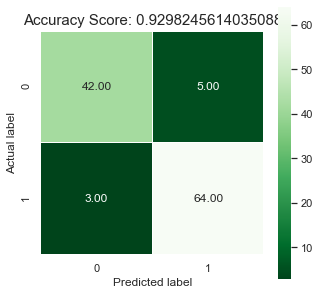

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

Accuracy of our decision tree model is 93%

### 3.2 Decision boundaries
Here you will go through several steps in order to display the decision boundaries together with a scatter plot of the data using two features at a time and keeping the others constant. 
- Select the five most important features from the decision tree attribute `clf.feature_importances`. 
- Take the first two features from this set and create meshgrids for a range of values such that they include 20% more on each side beyond the max-min range of the data values for this feature. For example, if the feature values span 30 to 130 then 20% of the max-min is 20, so the extent of the meshgrid for this feature should be 10 to 150. Create `xx` and `yy` as your meshgrids (each is a 2D array of values, `xx` for the first feature and `yy` for the second feature). For example: `xx, yy = np.meshgrid(np.arange(x_start, x_end, stepsize), np.arange(y_start, y_end, stepsize))`
- Use the function `predict()` to evaluate the classifier's predicted output class for each location in the meshgrid. The meshgrid entries will give values for the two selected features, but all other feature values need to be specified in order to call `predict()`, and these values should be copied from the Analysis Point. That is, a vector of length (dimension) 30 must be passed into the `predict()` function. Once you have done this for all points in the meshgrid (via loops or using ravel/reshape) then call the `contourf()` function like this – `contourf(xx, yy, Z, … other params …)` – where `Z` is the predicted class values, arranged to match the meshgrids. Do use the parameters “levels” and “colors” in `contourf()`. It is highly recommended to program all of this as a function for later reuse. 
- In the plot also display the scatterplot of the data (appropriately coloured by class) and add a “+” marker in an easy-to-see, contrasting colour (e.g. yellow) at the location of the Analysis Point. Note that all of the views will include the Analysis Point but remember that each instance is only a 2D plane formed from just two features, so only 2 elements from the Analysis Point vector are needed, as all the other 28 features are constant over this plane.
- Repeat the above procedure to create a plot for each unique pair of features from the five most important features. Arrange your plots within a 4x4 array of plots so that they occupy the upper triangular portion, as shown in the example image below. 

<center><img src="DecisionBoundaryExamples.png" width="700" alt="Example layout for decision boundary plots"></center>
    

In [13]:
columns = X.columns
X = X.values

In [14]:
def decisionBoundary(X,Y,u, v,analysis_point, five_important,clf):
    min1, max1 = X[:, u].min() - 1, X[:, u].max() + 1 #1st feature
    min2, max2 = X[:, v].min() - 1, X[:, v].max() + 1 #2nd feature
    
    x1_scale = np.arange(min1, max1, 0.2)
    x2_scale = np.arange(min2, max2, 0.2)
    
    x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)
    
    

    analysis_point = np.array(analysis_point,dtype=np.float64)
    analysis_point = analysis_point.reshape(1,30)
    x_g, y_g = x_grid.flatten(), y_grid.flatten()
    x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))
    
    
    grid = np.hstack((x_g, y_g))
    grid = np.array(grid,dtype=np.float64)
    final_grid = []
    for i in range(len(grid)):
        a = analysis_point
        for j in range(2):
            a[0][j] = grid[i][j]
        final_grid.append(a)
    final_grid = np.array(final_grid)
    final_grid = final_grid.reshape(len(x_g),30)
    grid = final_grid
    
    
    # make predictions for the grid
    p_pred = clf.predict(grid)
    pp_grid = p_pred.reshape(x_grid.shape)

            
            
    # plot the grid of x, y and z values as a surface
    surface = plt.contourf(x_grid, y_grid, pp_grid, cmap= plt.cm.RdYlBu)
    plt.colorbar(surface)
    
    # create scatter plot for samples from each class
    for class_value in range(2):
        row_ix = np.where(Y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, u], X[row_ix, v], cmap='Pastel1')
    # show the plot
    plt.xlabel(five_important[u])
    plt.ylabel(five_important[v])
    plt.show()

In [15]:
import numpy as np
importances = clf.feature_importances_

five_important = []

for i in range(5):
    a = np.where(importances == (max(importances)))
    five_important.append(columns[a])
    importances[a] = -5
five_important

[Index(['mean concave points'], dtype='object'),
 Index(['mean texture'], dtype='object'),
 Index(['worst perimeter'], dtype='object'),
 Index(['area error'], dtype='object'),
 Index(['mean area'], dtype='object')]

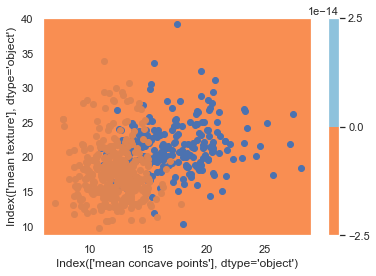

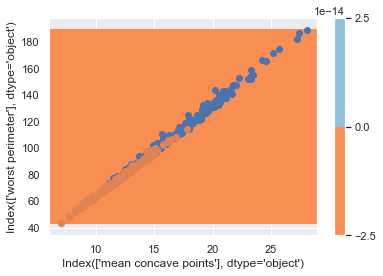

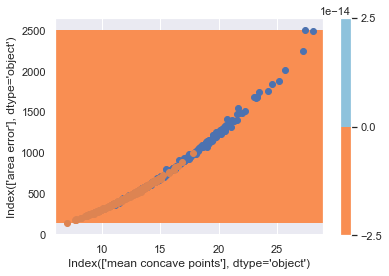

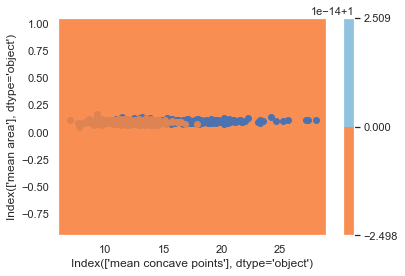

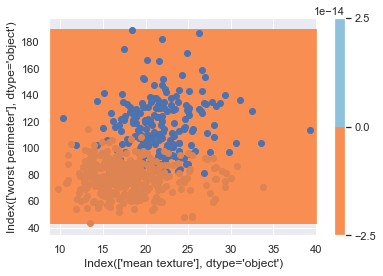

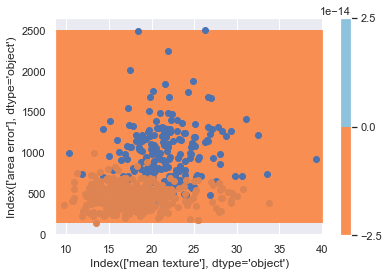

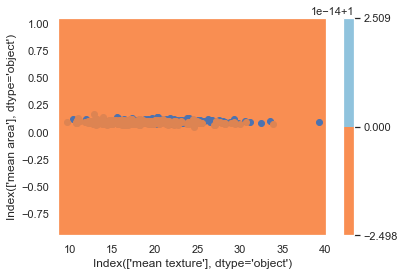

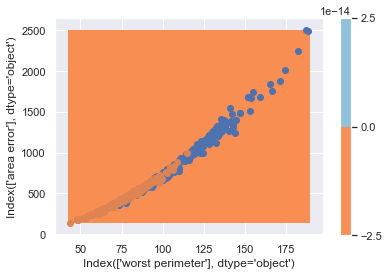

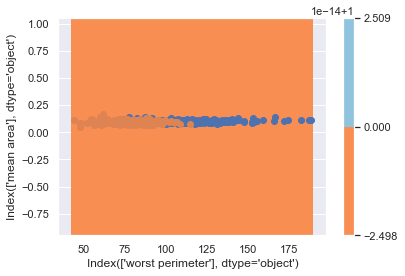

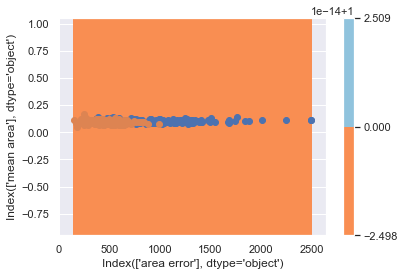

In [16]:
for i in range(len(five_important)):
    for j in range(i,len(five_important)):
        if five_important[j] != five_important[i]:
            decisionBoundary(X,Y,i,j, analysis_point, five_important,clf)
            

### 3.3 Questions
1. **Are the classes well separated by the decision boundaries, and are the shapes of the decision boundaries well adapted to the data?**
2. **Why might some of the plots only show one predicted class and no decision boundaries within the plot?**  (Note that you should see some of these - if not, comment on why such a plot, as shown in the example image above, could exist.)

No classes are not well separated by the decision boundaries. Some plot show one predicted class and has no boundaries because the grid value falls in both of the classes 

## 4 Train a support vector classifier with RBF kernel (10%)

### 4.1 Create a support vector classifier (SVC) object
Use a radial basis function kernel. Below, you will perform a hyper parameter search of C. Read about the remaining parameters of the classifier in the documentation and decide whether the default value is a good choice in this application. 

**Question: Are there any parameters where using a setting that is different from the default setting would be better for this application?**

The documentation can be found here: 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

Setting initial parameters as kernel="rbf", gamma=0.1, C=0.001 see the next cell where i have build pipeline and called SVC

### 4.2 Build a pipeline
This should include any pre-processing steps that you think are necessary. 

**Question: Is scaling of the data necessary for using a support vector classifier?**

In [17]:
# Create pipeline for training
rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])
rbf_kernel_svm_clf.fit(X_train, Y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=0.1))])

Yes scaling for support vector is necessary because its linear classification algorithm 

### 4.3 Perform a grid search
Use a five-fold cross validation over values of the regularisation parameter C. Choose the value range yourself. 

**Questions:**
1. **What is the best value for C?**
2. **How did you decide on the range of values to specify?**

In [18]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.626, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.934, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.868, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.945, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.923, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.967, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [19]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)


The best parameter of support vector machine are C=1, gamma=0.0001

## 5 Evaluate the support vector classifier (15%)

### 5.1 Performance
Calculate the confusion matrix, precision and recall of the final classifier using appropriate data and making sure that a 'positive' result corresponds to cancer (i.e., malignant cells). 

**Question: Based on these metrics, what is the chance of failing to detect a sample with cancer?**

In [20]:
predictions = grid.predict(X_test)
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        47\n           1       0.96      0.97      0.96        67\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

In [21]:
cm = confusion_matrix (Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)

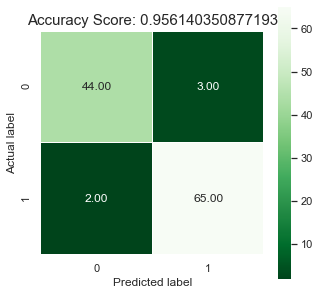

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

The accuracy of support vector machine model is 96%

### 5.2 Decision boundaries
Repeat what you did in section 3.3, but now for the results from the support vector classifier, reusing code when you can. Use the same five features as you used in section 3.3. Include the decision boundary, scatterplot of the data and the Analysis Point. ***In addition, mark the support vectors clearly.***

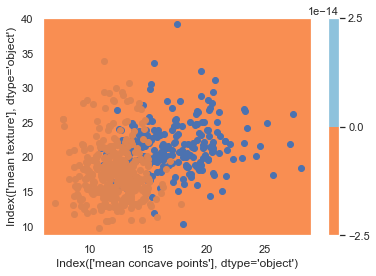

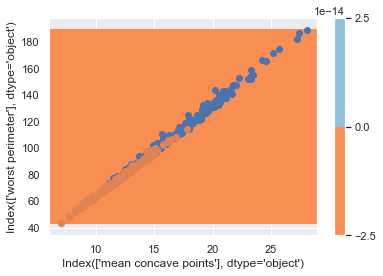

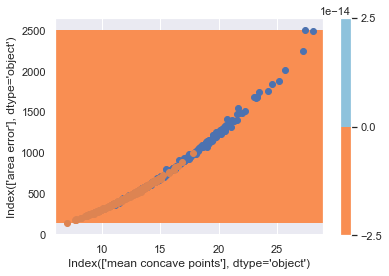

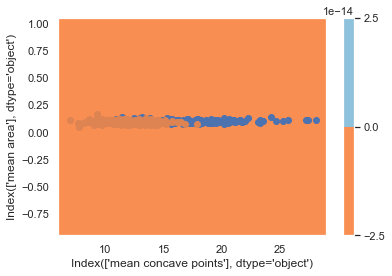

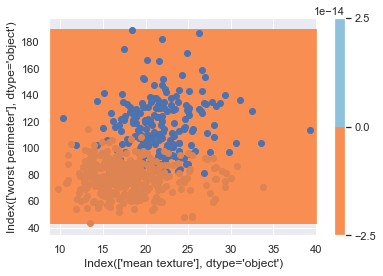

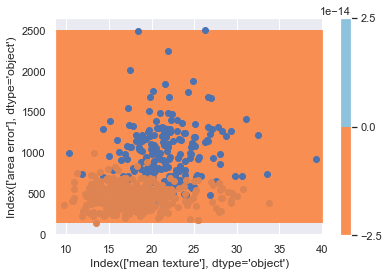

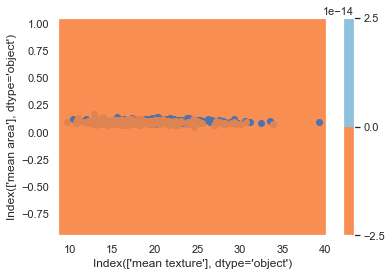

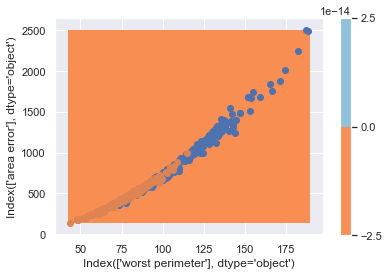

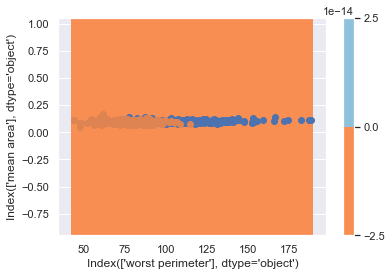

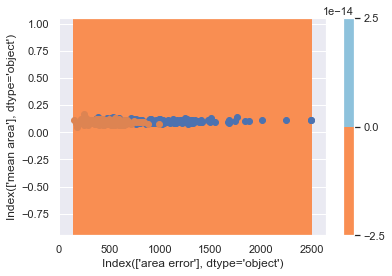

In [23]:
for i in range(len(five_important)):
    for j in range(i,len(five_important)):
        if five_important[j] != five_important[i]:
            decisionBoundary(X,Y,i,j, analysis_point, five_important,grid)

### 5.3 Questions
1. **What is the meaning of the support vectors?**
2. **Where can we see their purpose in the diagrams?**
3. **What are the strengths or weaknesses of this classifier compared to the decision tree?**

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier.
Decision trees are able to generate understandable rules where as support vector machine is difficult to understand and interpret the final model, variable weights and individual impact

## 6 Compare the classifiers and interpret (10%)

### 6.1 Question
**How well do the classifiers extrapolate outside of the central region near the Analysis Point?**

Classifiers does good most of times extrapolating outside of the central region near the Analysis Point.

### 6.2 Question
**Which classifier do you think performs better and what are the reasons for your choice?**

I think support vector machine performs well in this case. One reason for this is that it gives high auuracy on test data then decision tree model. Also  the risk of over-fitting is less in SVM.

### 6.3 Questions
1. **Do you see sources of bias in the two classifiers?**
2. **Are either of the classifiers showing any signs of overfitting or underfitting?  Give reasons for your answers.**

SVM and decision tree model both overfits if we don't use the best parameters we got from grid search.

## Assessment
Hand in your notebook as an .ipynb file via the MyUni page. Make sure your notebook includes your code and formatted (Markdown) text blocks explaining what you have done. Your mark will be based on both code correctness and the quality of your comments and analysis. 

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson and Stephan Lau  
March 2021